In [27]:
'''
__author__: Anmol_Durgapal(@slothfulwave612)

A Python module for plotting radar-chart.

The radar-chart theme is inspired from @Statsbomb.
'''

## import necessary packages/modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import utils

class Radar:
    """
    class contains methods to make radar-chart.
    """

    def __init__(
        self, background_color="#FFFFFF", patch_color="#D6D6D6", fontfamily="Liberation Serif", 
        label_fontsize=10, range_fontsize=6.5, label_color="#000000", range_color="#000000"
        ):
        """
        Function to initialize the object of the class.

        Args:
            background_color (str, optional): the background color. Defaults to "#FFFFFF".
            patch_color (str, optional): the color for our circle. Defaults to "#D6D6D6".
            fontfamily (str, optional): fontfamily available in matplotlib. Defaults to "Liberation Serif".
            label_fontsize (float, optional): the fontsize of label. Defaults to 10.
            range_fontsize (float, optional): the fontsize for range values. Defaults to 6.5.
            label_color (str, optional): color value for labels. Defaults to "#000000".
            range_color (str, optional): color value for ranges. Defaults to "#000000".
        """        
        self.background_color = background_color
        self.patch_color = patch_color
        self.fontfamily = fontfamily
        self.label_fontsize = label_fontsize
        self.range_fontsize = range_fontsize
        self.label_color = label_color
        self.range_color = range_color

    def plot_radar(self, ranges, params, values, radar_color, filename=None, dpi=300,
                   title=dict(), alphas=[0.6, 0.6], compare=False, endnote=None, 
                   end_size=9, end_color="#95919B", image=None, image_coord=None, figax=None, **kwargs):
        """
        Function to plot radar-chart.

        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            params (list): list of string values containing the name of parameters.
            values (list): list of float values for each parameters/ nested list when making comparison charts.
            radar_color (list): list of two color values.
            filename (str, optional): the name per which the file will be saved added extension. Defaults to None.
            dpi (int, optional): dots per inch value. Defaults to 300.
            title (str, optional): containing information of title and subtitle. Defaults to dict().
            alphas (list, optional): alpha value for color. Defaults to [0.6, 0.6].
            compare (bool, optional): True, if comparison charts are to be made. Defaults to False.
            endnote (str, optional): the endnote of the plot. Defaults to None.
            end_size (int, optional): the font-size for the endnote string. Defaults to 9.
            end_color (str, optional): color of the endnote. Defaults to "#95919B".
            image (str, optional): image name to be added. Defaults to None.
            image_coord (list, optional): containing left, bottom, width, height for image. Defaults to None.
            figax tuple, optional): figure and axis object. Defaults to None.
            **kwargs --  All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

        Returns:
            matplotlib.figure.Figure: figure object.
            axes.Axes: axis object.
        """        
        
        ## assert required conditions 
        assert len(ranges) >= 3, "Length of ranges should be greater than equal to 3"
        assert len(params) >= 3, "Length of params should be greater than equal to 3"

        if compare == True:
            ## for making comparison radar charts
            assert len(values) == len(radar_color) == len(alphas), "Length for values, radar_color and alpha do not match"
        else:
            assert len(values) >= 3, "Length of values should be greater than equal to 3"
            assert len(ranges) == len(params) == len(values), "Length for ranges, params and values not matched"

        if figax:
            fig, ax = figax
        else:
            fig, ax = plt.subplots(figsize=(20, 10), facecolor=self.background_color)
            ax.set_facecolor(self.background_color)

        ## set axis
        ax.set_aspect('equal')
        ax.set(xlim=(-22, 22), ylim=(-23, 25))

        if type(radar_color) == str:
            ## make radar_color a list
            radar_color = [radar_color]
            radar_color.append('#D6D6D6')

        ## add labels around the last circles
        ax = self.__add_labels(params=params, ax=ax)

        ## add ranges
        ax, xy, range_values = self.__add_ranges(ranges=ranges, ax=ax,)

        if compare == True:
            ## for making comparison radar charts

            for i in range(len(values)):
                ## fetch value
                value = values[i]

                ## get vertices
                vertices = self.__get_vertices(value, xy, range_values)

                ## make the radar chart
                ax = self.__plot_circles(ax=ax, radar_color=radar_color[i], vertices=vertices, alpha=alphas[i], compare=True)

        else:
            ## get vertices
            vertices = self.__get_vertices(values, xy, range_values)

            ## make the radar chart
            ax = self.__plot_circles(ax=ax, radar_color=radar_color, vertices=vertices)
        
        ## add credits 
        #ax.text(22, -21.5, 'Inspired By: Statsbomb / Rami Moghadam', fontfamily=self.fontfamily, ha='right',
               # fontdict={"color": end_color}, fontsize=end_size)

        ## add endnote
        if endnote != None:
            y_add = -22.5
            for note in endnote.split('\n'):
                ax.text(22, y_add, note, fontfamily=self.fontfamily, ha='right',
                        fontdict={"color": end_color}, fontsize=end_size)
                y_add -= 1

        ## tidy axis
        ax.axis('off')
        
        if len(title) > 0:
            ax = self.__plot_titles(ax, title)

        ## add image
        if image != None and image_coord != None:
            fig = utils.add_image(image, fig, image_coord[0], image_coord[1], image_coord[2], image_coord[3], **kwargs)

        if filename:
            fig.savefig(filename, dpi=dpi, bbox_inches='tight')

        return fig, ax

    def __plot_titles(self, ax, title):
        """
        Function for plotting title values to the radar-chart.

        Args:
            ax (axes.Axes): axis object.
            title (dict): containing information of title and subtitle.

        Returns:
            axes.Axes: axis object.
        """        

        if title.get('title_color') == None:
            ## add title color
            title['title_color'] = '#000000'

        if title.get('subtitle_color') == None:
            ## add a subtitle color
            title['subtitle_color'] = '#000000'

        if title.get('title_fontsize') == None:
            ## add titile fontsize
            title['title_fontsize'] = 20
        
        if title.get('sub_title_fontsize') == None:
            ## add subtitle fontsize
            title['subtitle_fontsize'] = 15

        if title.get('title_fontsize_2') == None:
            ## add title fontsize 2
            title['title_fontsize_2'] = title['title_fontsize']

        if title.get('subtitle_fontsize_2') == None:
            ## add subtitle fontsize 2
            title['subtitle_fontsize_2'] = title['subtitle_fontsize']   

        if title.get('title_name'):
            ## plot the title name
            ax.text(-22, 24, title['title_name'], fontsize=title['title_fontsize'], fontweight='bold', 
                    fontdict={'color': title['title_color']}, fontfamily=self.fontfamily)
        
        if title.get('subtitle_name'):
            ## plot the title name
            ax.text(-22, 22, title['subtitle_name'], fontsize=title['subtitle_fontsize'], 
                    fontdict={'color': title['subtitle_color']}, fontfamily=self.fontfamily)

        if title.get('title_color_2') == None:
            ## add title color
            title['title_color_2'] = '#000000'
        
        if title.get('subtitle_color_2') == None:
            ## add subtitle color
            title['subtitle_color_2'] = '#000000'
        
        if title.get('title_name_2'):
            ## plot the second title name
            ax.text(22, 24, title['title_name_2'], fontsize=title['title_fontsize_2'], fontweight='bold', 
                    fontdict={'color': title['title_color_2']}, ha='right', fontfamily=self.fontfamily)
        
        if title.get('subtitle_name_2'):
            ## plot the second subtitle name
            ax.text(22, 22, title['subtitle_name_2'], fontsize=title['subtitle_fontsize_2'], 
                    fontdict={'color': title['subtitle_color_2']}, ha='right', fontfamily=self.fontfamily) 
        
        return ax

    def __plot_circles(self, ax, radar_color, vertices, alpha=None, compare=False):
        """
        Function to plot concentric circles.

        Args:
            ax (axes.Axes): axis object.
            radar_color (list): color values.
            vertices (list): coordinate values for each vertex of the polygon.
            alpha (list, optional): alpha values for colors. Defaults to None.
            compare (bool, optional): True, if a comparison chart is to be made. Defaults to False.

        Returns:
            axes.Axes: axis object.
        """        

        ## radius value for each circle
        radius = [3.35, 6.7, 10.05, 13.4, 16.75]

        ## linewidth, zorder for circle
        lw_circle, zorder_circle =  20, 2

        if compare:    ## for making comparison radar charts
            ## plot a polygon
            radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle+1, alpha=alpha)
            ax.add_patch(radar_1)
        else:
            ## plot a polygon
            radar_1 =  Polygon(vertices, fc=radar_color[0], zorder=zorder_circle-1)
            ax.add_patch(radar_1)

        ## create concentric circles 
        for rad in radius:
            ## create circle
            circle_1 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=self.patch_color, lw=lw_circle, zorder=zorder_circle)
            ax.add_patch(circle_1)

            if compare == False:
                ## create another circle to fill in second color
                circle_2 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=radar_color[1], lw=lw_circle, zorder=zorder_circle+1)
                circle_2.set_clip_path(radar_1)
                ax.add_patch(circle_2)
        
        return ax

    def __add_labels(self, params, ax, return_list=False, radius=19, range_val=False):
        """
        Function to add labels around the last circle.

        Args:
            params (list): values containing the name of parameters.
            ax (axes.Axes): axis object.
            return_list (bool, optional): x and y values. Defaults to False.
            radius (int, optional): radius of the circle around which labels are to be align. Defaults to 19.
            range_val (bool, optional): to specify whether to plot range or not. Defaults to False.

        Returns:
            axes.Axes: axis object.
            list: coordinate values (if return_list == True)
        """        
        
        ## get coordinates and rotation values
        coord = utils.get_coordinates(n=len(params))

        if return_list == True:
            x_y = []

        for i in range(len(params)):
            ## fetch rotation value
            rot = coord[i, 2]

            ## the x and y coordinate for labels
            x, y = (radius*np.sin(rot), radius*np.cos(rot))

            if return_list == True:
                ## add x_y cordinates 
                tup_temp = (x, y)
                x_y.append(tup_temp)

            if y < 0:
                rot += np.pi

            if type(params[i]) == np.float64:
                p = round(params[i], 2)
            else:
                p = params[i]

            if range_val == True:
                size = self.range_fontsize
                color = self.range_color
            else:
                size = self.label_fontsize
                color = self.label_color
        
            ax.text(x, y, p, rotation=-np.rad2deg(rot), ha='center', va='center', 
                    fontsize=size, fontfamily=self.fontfamily, fontdict=dict(color=color))
        
        if return_list == True:
            return ax, x_y
        else:
            return ax

    def __add_ranges(self, ranges, ax):
        """
        Function to add range value around each circle.

        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            ax (axes.Axes): axis object.

        Returns:
            axes.Axes: axis object.
            numpy.array: x and y coordinate for each numerical range values.
            numpy.array: range value for each parameter.
        """        

        ## radius value for every circle
        radius = [2.5, 4.1, 5.8, 7.5, 9.2, 10.9, 12.6, 14.3, 15.9, 17.6]

        ## x and y coordinate values for range numbers
        x_y = []

        ## range values for every ranges
        range_values = np.array([])

        for rng in ranges:
            value = np.linspace(start=rng[0], stop=rng[1], num=10)
            range_values = np.append(range_values, value)
        
        range_values = range_values.reshape((len(ranges),10))

        for i in range(len(radius)):

            ## parameter list
            params = range_values[:, i]

            ax, xy = self.__add_labels(params=params, ax=ax, return_list=True, radius=radius[i], range_val=True)
            x_y.append(xy)

        return ax, np.array(x_y), range_values

    def __get_vertices(self, values, xy, range_values):
        """
        Function to get vertex coordinates(x and y) for the required polygon.

        Args:
            values (list): value for each parameter.
            xy (numpy.array): coordinate values for each label-number.
            range_values (numpy.array): range value for each parameter.

        Returns:
            numpy.array: coordinates for each vertex of the polygon.
        """        

        ## init an empty list
        vertices = []

        ## calculating coordinate values
        for i in range(len(range_values)):
            
            ## list of range value for each parameter
            range_list = range_values[i, :]
            coord_list = xy[:, i]

            if range_list[0] > range_list[-1]:
                ## if range values are in reversed order
                if values[i] >= range_list[0]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]

                elif values[i] <= range_list[-1]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]

                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = utils.get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=True)

            else:
                if values[i] >= range_list[-1]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]

                elif values[i] <= range_list[0]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]

                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = utils.get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=False)

            ## add x-y coordinate in vertices as a list
            vertices.append([x_coord, y_coord])
        
        return vertices       

    def __repr__(self):
        return f"""{self.__class__.__name__}(
            background_color={self.background_color},
            patch_color={self.patch_color},
            fontfamily={self.fontfamily},
            label_fontsize={self.label_fontsize},
            range_fontsize={self.range_fontsize},
            label_color={self.label_color},
            range_color={self.range_color}
        )"""

    ## __str__ is the same as __repr__
    __str__ = __repr__

KeyError: 'polar'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

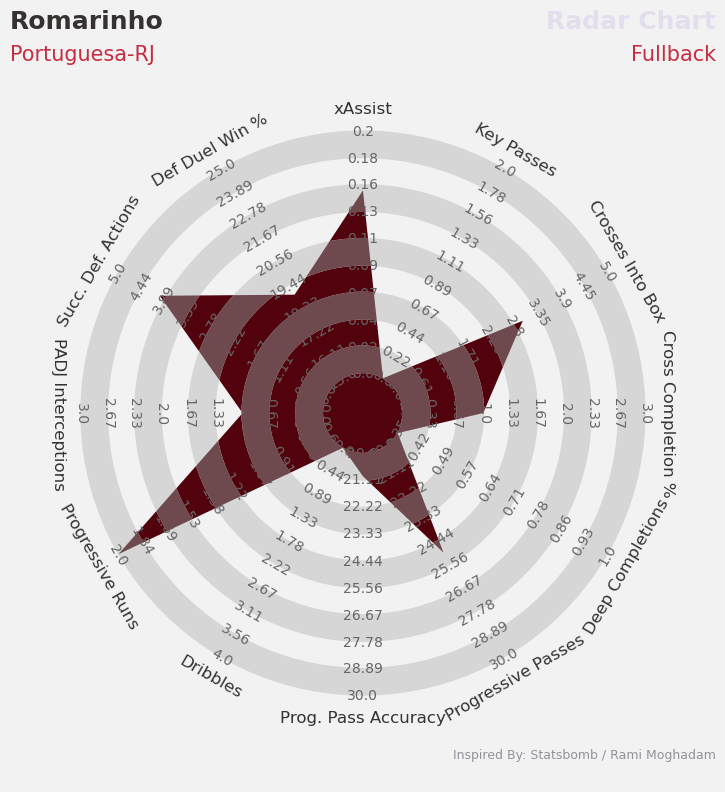

In [41]:
from soccerplots.radar_chart import Radar

## parameter names
params = ['xAssist', 'Key Passes', 'Crosses Into Box', 'Cross Completion %', 'Deep Completions',
          'Progressive Passes', 'Prog. Pass Accuracy', 'Dribbles', 'Progressive Runs',
          'PADJ Interceptions', 'Succ. Def. Actions', 'Def Duel Win %']

## range values
ranges = [(0.0, 0.2), (0.0, 2), (0.06, 5), (0, 3), (0.35, 1),
          (20, 30), (20, 30), (0.0, 4), (0.6, 2),
          (0, 3), (0, 5), (15, 25)]

## parameter value
values = [0.15, 0, 3, 1, 0, 25, 21, 0, 2.22, 1, 4, 19]

## title values
title = dict(
    title_name="Romarinho",
    title_color="#383132",
    subtitle_name="Portuguesa-RJ",
    subtitle_color="#C72C41",
    title_name_2="Radar Chart",
    title_color_2="#E3DDED",
    subtitle_name_2='Fullback',
    subtitle_color_2='#C72C41',
    title_fontsize=18,
    subtitle_fontsize=15
)

## instantiate object 
radar = Radar(background_color="#F2F2F2", patch_color="#D6D6D6", label_color="#333333",
              range_color="#666666", label_fontsize=12, range_fontsize=10)

fig, ax = radar.plot_radar(ranges=ranges, params=params, 
                           values=values, radar_color=['#52020c', '#6e494e'], 
                           title=title)#, image='image.jpg', image_coord=[0.475, 0.80, 0.08, 0.2])

## Customize aesthetics
ax.spines['polar'].set_visible(False)  # Hide polar axes
ax.grid(color='#CCCCCC')  # Add grid lines
ax.set_facecolor('#F2F2F2')  # Set background color
ax.set_xticklabels(params, fontsize=10, color='#333333')  # Customize x-axis labels
ax.set_yticklabels([])  # Hide y-axis labels
plt.show()
